In [1]:
import pandas as pd
import lxml.html
import requests

In [2]:
res = requests.get('https://search.naver.com/search.naver?&where=news&query=%EC%BD%94%EB%A1%9C%EB%82%98&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=69&start=1&refresh_start=0')

In [3]:
root = lxml.html.fromstring(res.text)

In [4]:
content = root.cssselect('ul.type01')[0].text_content()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [6]:
tdm = cv.fit_transform([content]).toarray()

In [7]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [8]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
91,네이버뉴스,23
257,코로나19,21
153,선정,16
255,코로나,14
236,종합,12
138,보내기,10
7,1시간,9
201,위기,9
75,기회,8
85,남북,7


단어 구름 그리기

In [9]:
from wordcloud import WordCloud

In [10]:

wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [11]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [12]:
wc.fit_words(frequencies)

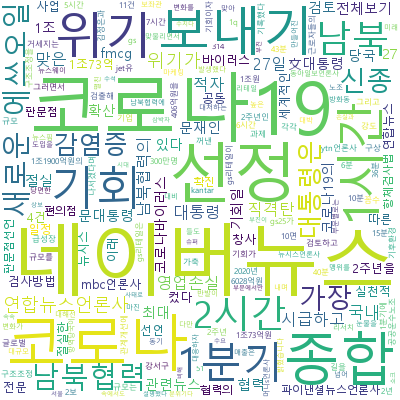

In [13]:
wc.to_image()